# Simple Keras CNN on mnist dataset 

## Load and Inspect Data

In [0]:
# get data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# make last dimension of size 1 to denote greyscale
x_train.shape += (1,) 
x_test.shape += (1,)

# normalize
x_train = x_train/255
x_test = x_test/255

# get data parameters
inputShape =  x_train.shape[1:]
classCount = len(set(y_test))

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Trainset Class Distrubtion')

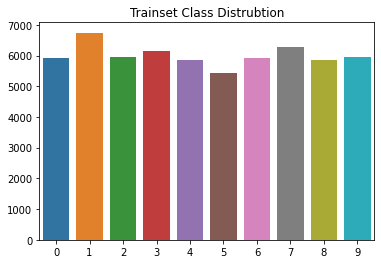

In [0]:
# View class distributions in training set

from collections import Counter
import seaborn as sns

train_dist = dict(Counter(y_train).items())
graph = sns.barplot(list(train_dist.keys()), list(train_dist.values()))
graph.set_title("Trainset Class Distrubtion")

Text(0.5, 1.0, 'Testset Class Distrubtion')

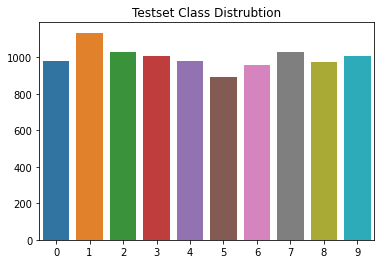

In [0]:
# View class distributions in test set

test_dist = dict(Counter(y_test).items())
graph = sns.barplot(list(test_dist.keys()), list(test_dist.values()))
graph.set_title("Testset Class Distrubtion")

In [0]:
from keras.utils import to_categorical

# onehot encode truth values 
y_test = to_categorical(y_test, classCount)
y_train = to_categorical(y_train, classCount)

## Construct model

In [0]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Input,Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()

model.add(Conv2D(64,kernel_size=(5, 5), activation='relu', input_shape = inputShape))
model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((3,3)))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128,kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((3,3)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

adam = optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, amsgrad=True) 
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

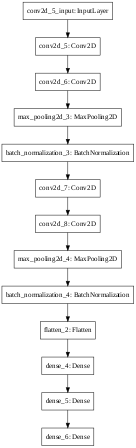

In [0]:
# visualize the model

from keras.utils import plot_model
plot_model(model, dpi=35)

## Training

In [0]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 14s 260us/step - loss: 0.1314 - accuracy: 0.9607 - val_loss: 0.0634 - val_accuracy: 0.9810
Epoch 2/2
54000/54000 [==============================] - 14s 262us/step - loss: 0.0561 - accuracy: 0.9840 - val_loss: 0.0646 - val_accuracy: 0.9835


In [0]:
# normally would plot training, unneccessary for this dataset

## Evaluate Performance

In [0]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, auc

predictions = model.predict(x_test)

preds = np.argmax(predictions, axis=1)
ground_truth = np.argmax(y_test, axis=1)

f1 = f1_score(ground_truth, preds, average='macro')
acc = accuracy_score(ground_truth, preds)

print("Test Performance")
print(f"F1: {f1}")
print(f"Accuracy: {acc}")

Test Performance
F1: 0.9806292935915939
Accuracy: 0.981


(10.5, -0.5)

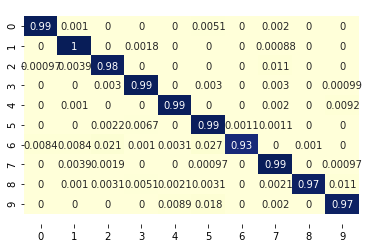

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(ground_truth, preds)

conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1, keepdims=True)
heat_map = sns.heatmap(conf_matrix,
            annot=True,
            cbar=False,
            cmap="YlGnBu")
bottom, top = heat_map.get_ylim()
heat_map.set_ylim(bottom + 0.5, top - 0.5)

In [0]:
from sklearn.metrics import classification_report

print(classification_report(ground_truth, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.94      0.99      0.96       892
           6       1.00      0.93      0.96       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.97      0.99       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

